# Análise da Equação de Duffing forçada e amortecida, variando $a, b, c, \lambda \mbox{ e } \Omega$

Usando Runge-Kutta - Estratégia 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definição da EDO de Duffing forçado
def duffing(t, z, a, b, c, lam, Omega):
    x, y = z
    dxdt = y
    dydt = -c*y - a*x - b*x**3 + lam*np.cos(Omega*t)
    return np.array([dxdt, dydt])

# Implementação manual de RK4
def rk4(f, t_span, z0, h, a, b, c, lam, Omega, max_val=1e3):
    t0, tf = t_span
    N = int((tf - t0)/h)
    t = np.linspace(t0, tf, N+1)
    z = np.zeros((N+1, 2))
    z[0] = z0
    for i in range(N):
        k1 = f(t[i], z[i], a, b, c, lam, Omega)
        k2 = f(t[i] + h/2, z[i] + h*k1/2, a, b, c, lam, Omega)
        k3 = f(t[i] + h/2, z[i] + h*k2/2, a, b, c, lam, Omega)
        k4 = f(t[i] + h, z[i] + h*k3, a, b, c, lam, Omega)
        z[i+1] = z[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        # Controle de estouro numérico
        if np.any(np.abs(z[i+1]) > max_val):
            z = z[:i+2]   # corta a simulação até o ponto atual
            t = t[:i+2]
            break
    return t, z

In [3]:
# Parâmetros
c = 0.05
a_vals = [-1, 1]
b_vals = [-1, 1]
lam_vals = [0.01] # [0.4, 0.8]
Omega_vals = [1.0] # [2.0, 3.0]

In [4]:
# Condições iniciais
z0 = [0.5, 0.0]
h = 0.01
t_span = (0, 100)

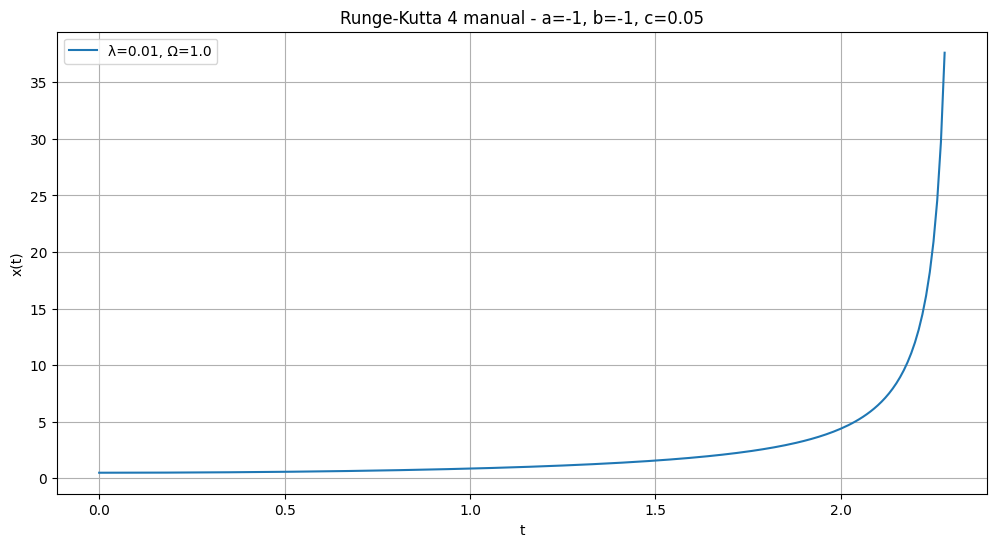

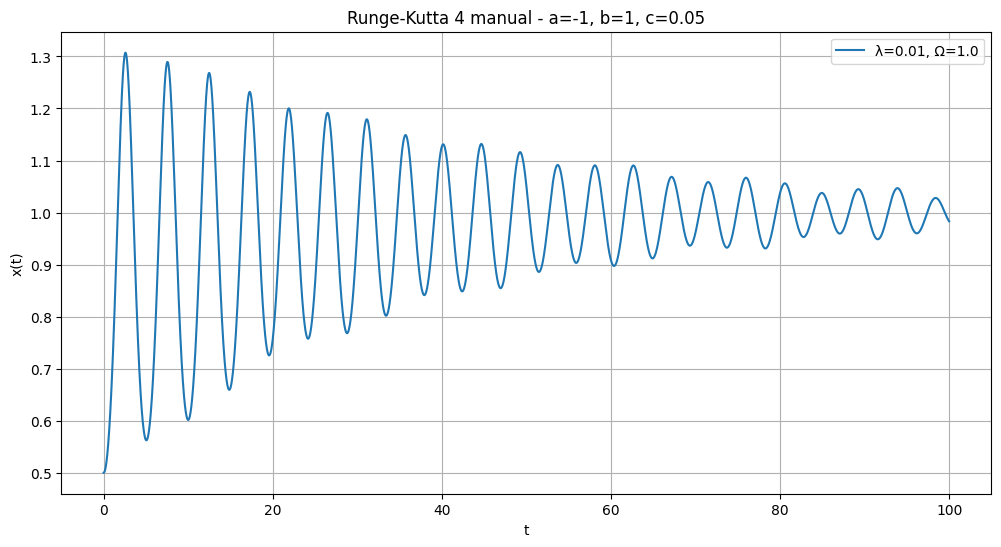

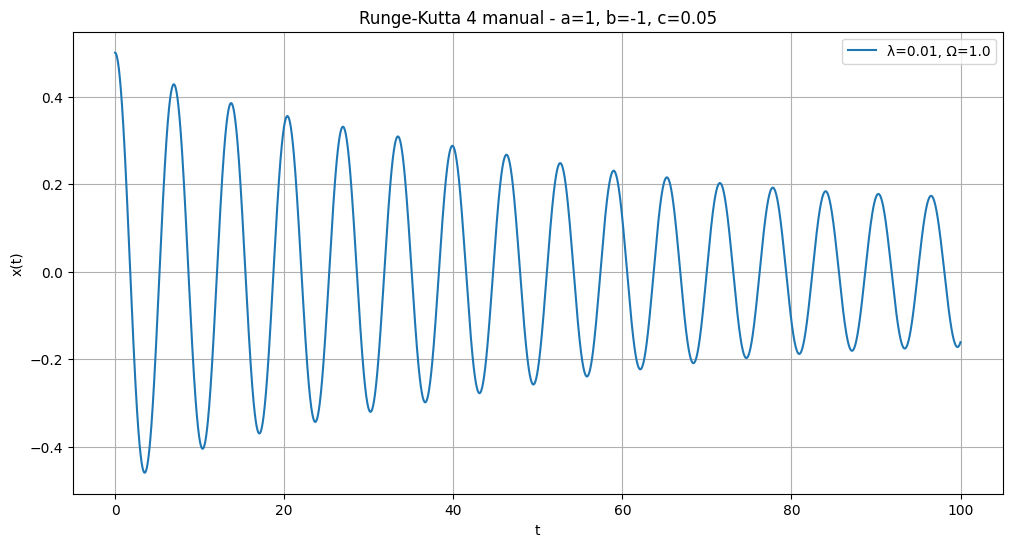

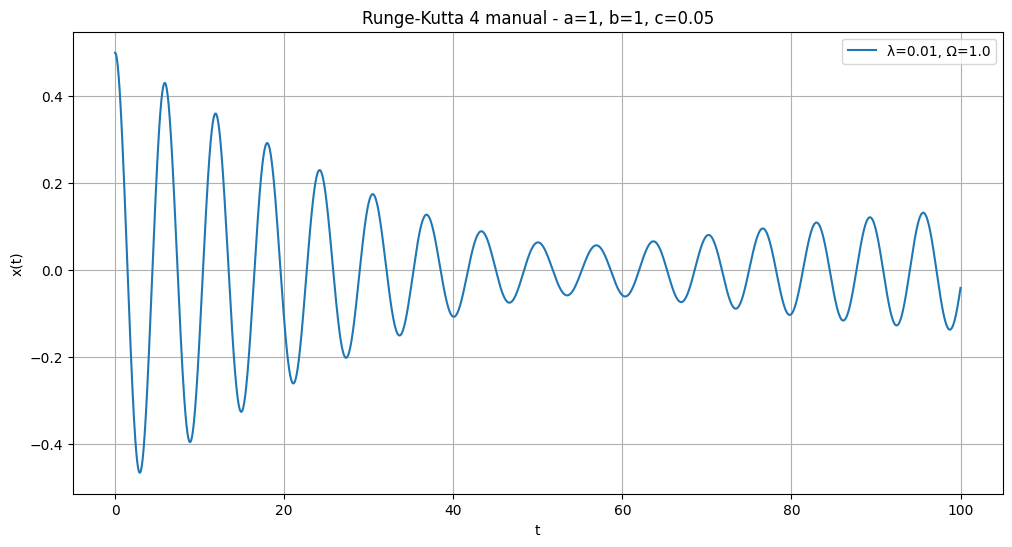

In [5]:
# Simulação e gráficos
for a in a_vals:
    for b in b_vals:
        plt.figure(figsize=(12,6))
        for lam in lam_vals:
            for Omega in Omega_vals:
                t, z = rk4(duffing, t_span, z0, h, a, b, c, lam, Omega)
                plt.plot(t, z[:,0], label=f"λ={lam}, Ω={Omega}")
        plt.title(f"Runge-Kutta 4 manual - a={a}, b={b}, c={c}")
        plt.xlabel("t")
        plt.ylabel("x(t)")
        plt.legend()
        plt.grid()
        plt.show()

In [28]:
lam_vals = [0.4, 0.8]
Omega_vals = [2.0, 3.0]

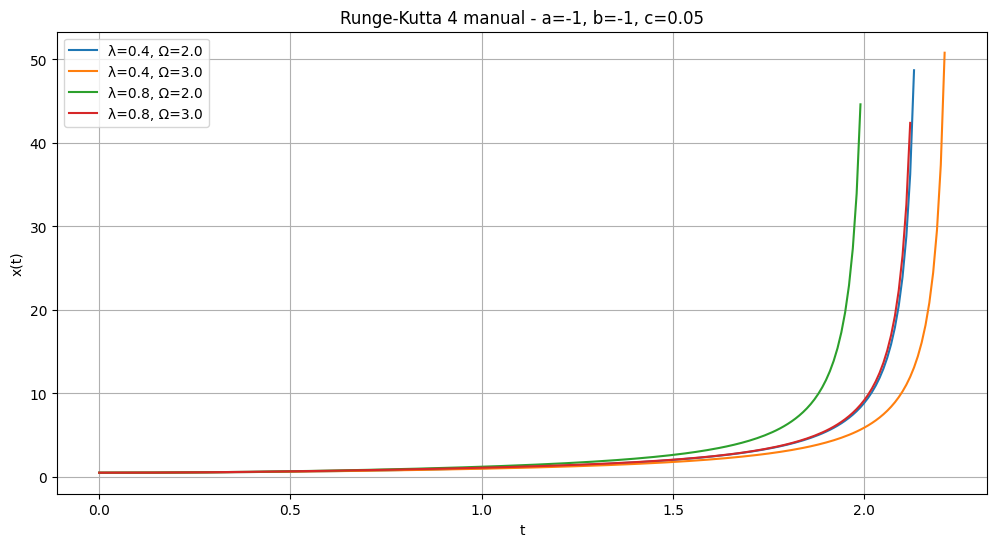

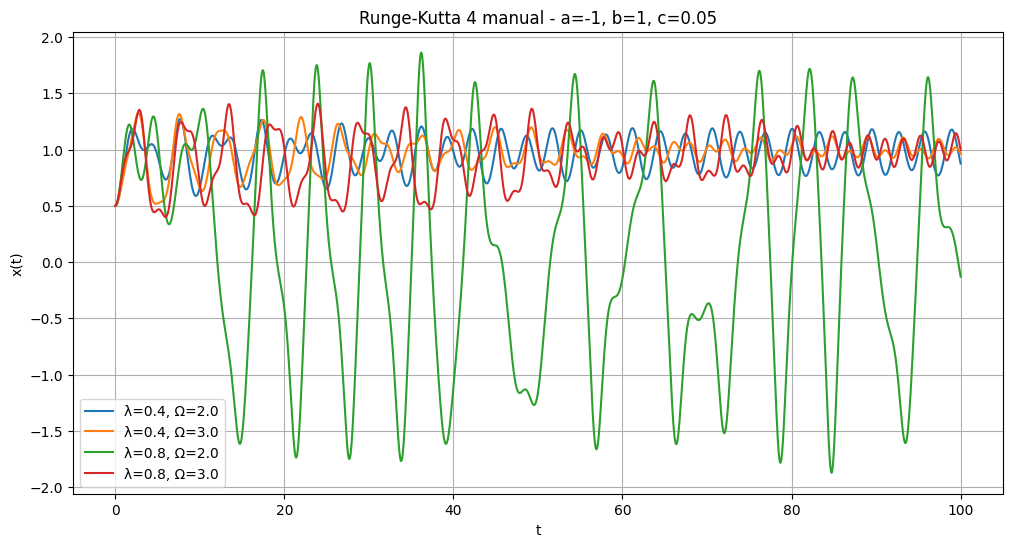

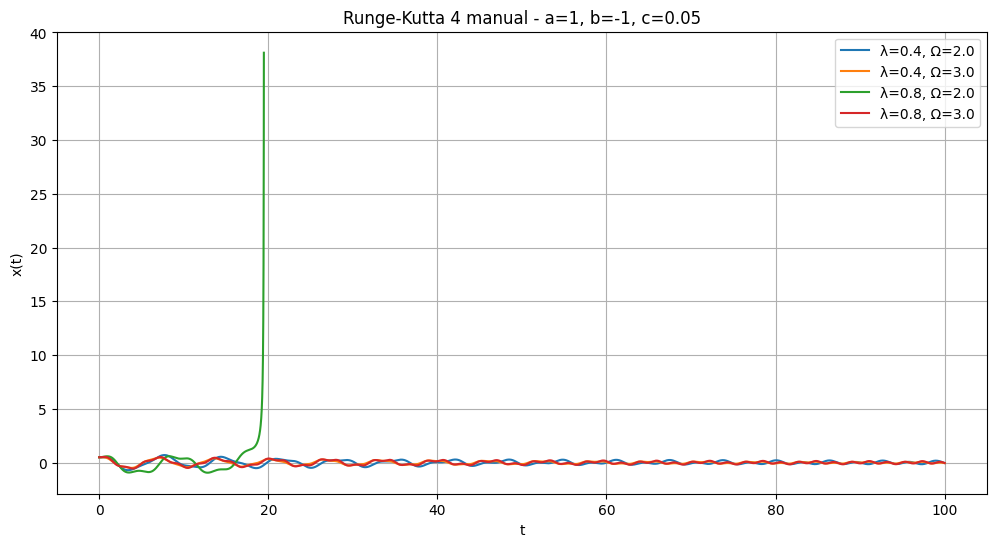

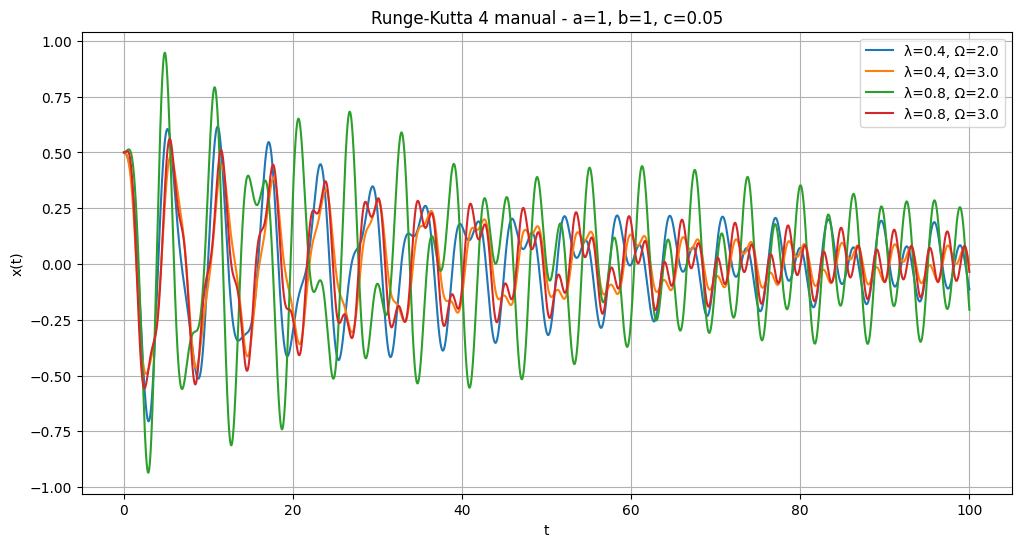

In [29]:
# Simulação e gráficos
for a in a_vals:
    for b in b_vals:
        plt.figure(figsize=(12,6))
        for lam in lam_vals:
            for Omega in Omega_vals:
                t, z = rk4(duffing, t_span, z0, h, a, b, c, lam, Omega)
                plt.plot(t, z[:,0], label=f"λ={lam}, Ω={Omega}")
        plt.title(f"Runge-Kutta 4 manual - a={a}, b={b}, c={c}")
        plt.xlabel("t")
        plt.ylabel("x(t)")
        plt.legend()
        plt.grid()
        plt.show()

Método Runge-Kutta - Usando scipy.integrate.solve_ivp

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [9]:

# Definição da EDO de Duffing
def duffing(t, z, a, b, c, lam, Omega):
    x, y = z
    dxdt = y
    dydt = -c*y - a*x - b*x**3 + lam*np.cos(Omega*t)
    return [dxdt, dydt]

In [32]:
# Parâmetros
c = 0.05
a_vals = [-1, 1]
b_vals = [-1, 1]
lam_vals = [0.01] 
Omega_vals = [1.0]

In [33]:
# Condições iniciais
z0 = [0.5, 0.0]
t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 5000)

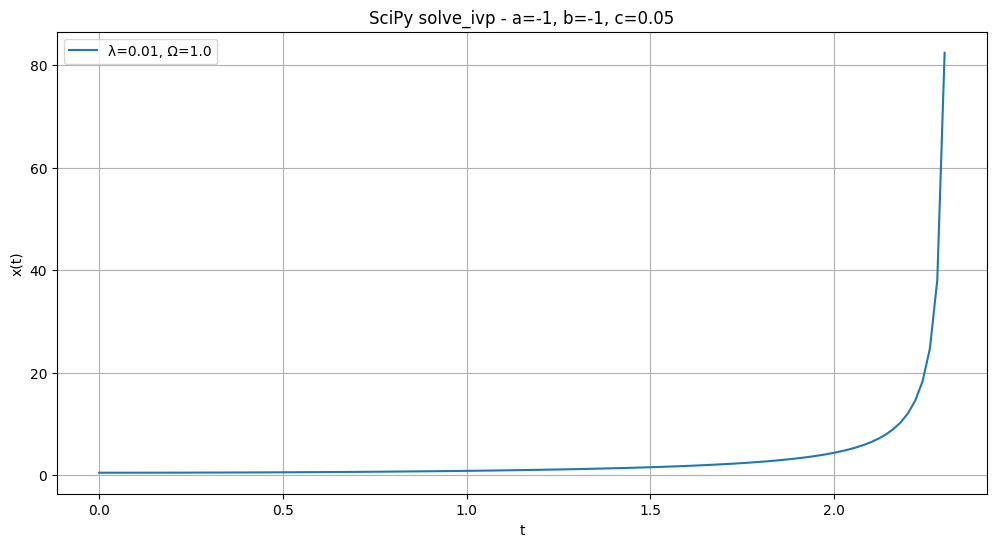

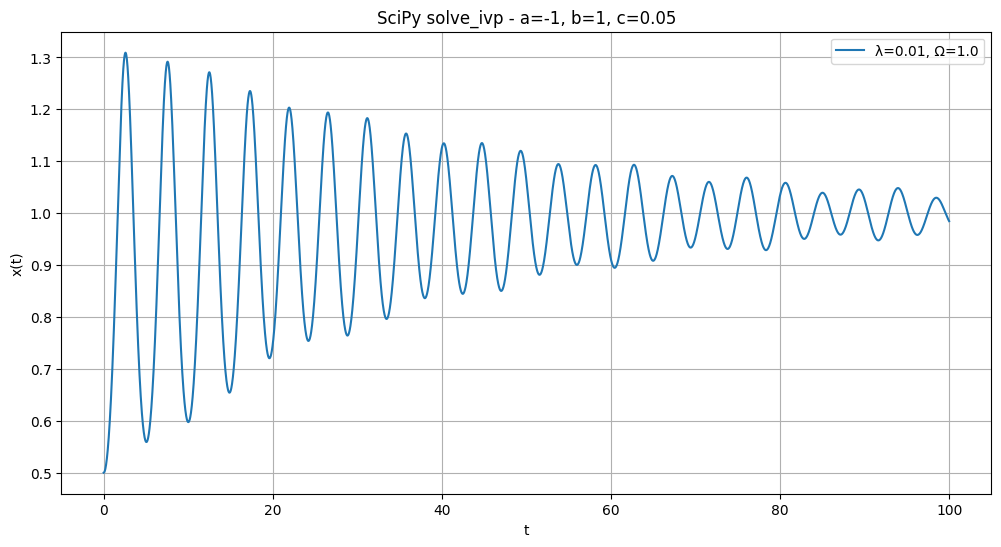

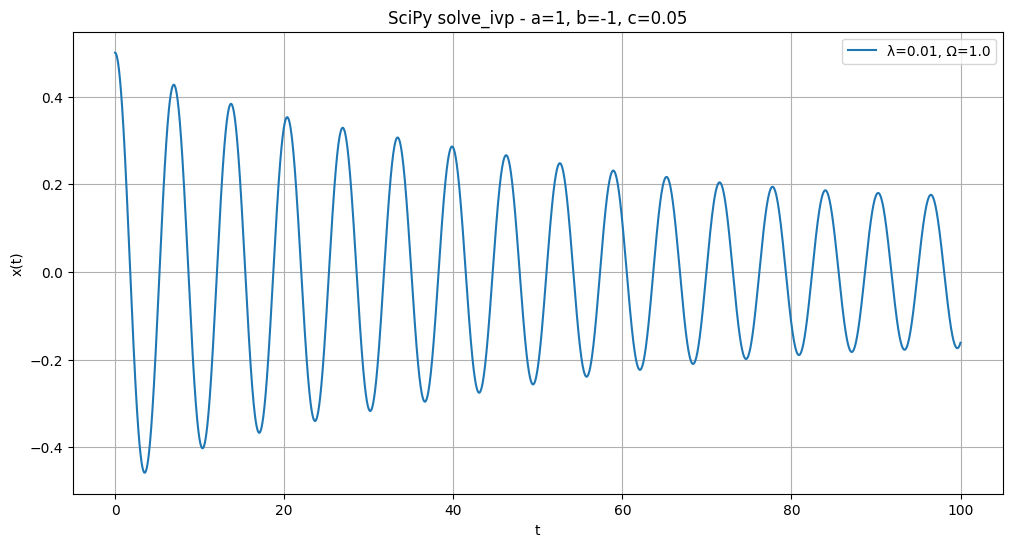

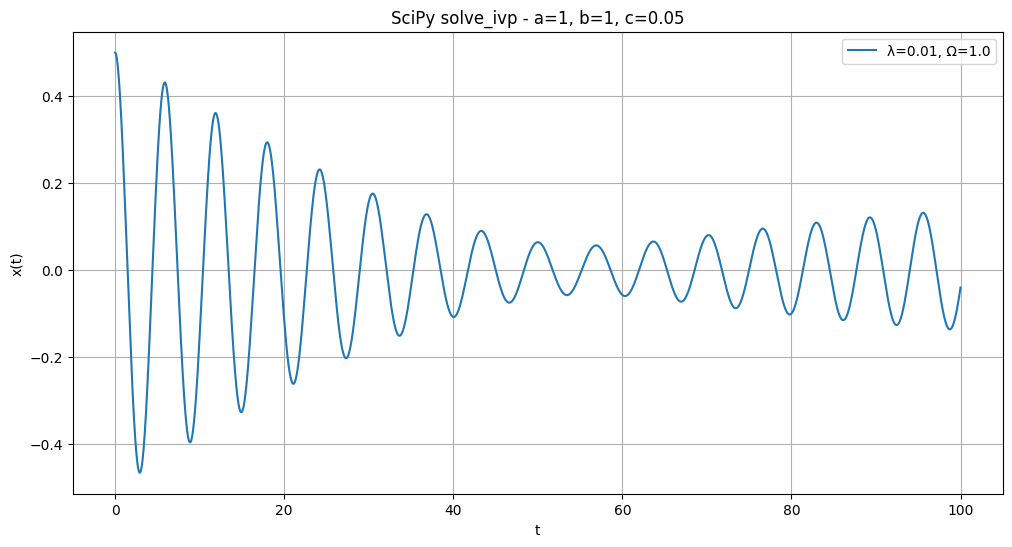

In [34]:
# Simulação e gráficos
for a in a_vals:
    for b in b_vals:
        plt.figure(figsize=(12,6))
        for lam in lam_vals:
            for Omega in Omega_vals:
                sol = solve_ivp(duffing, t_span, z0, args=(a, b, c, lam, Omega), t_eval=t_eval, method="RK45")
                plt.plot(sol.t, sol.y[0], label=f"λ={lam}, Ω={Omega}")
        plt.title(f"SciPy solve_ivp - a={a}, b={b}, c={c}")
        plt.xlabel("t")
        plt.ylabel("x(t)")
        plt.legend()
        plt.grid()
        plt.show()

In [35]:
lam_vals = [0.4, 0.8]
Omega_vals = [2.0, 3.0]

In [11]:
# Condições iniciais
z0 = [0.5, 0.0]
t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 5000)

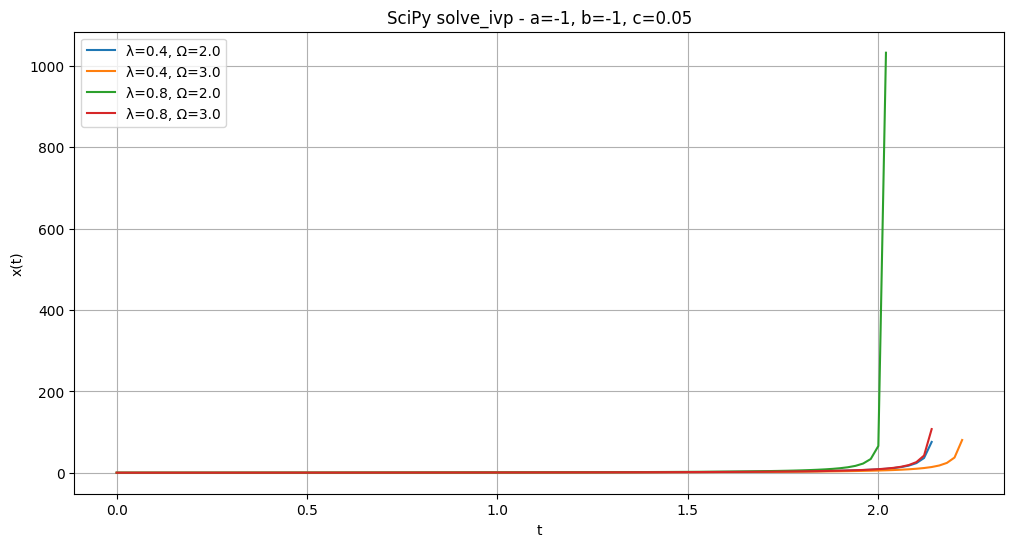

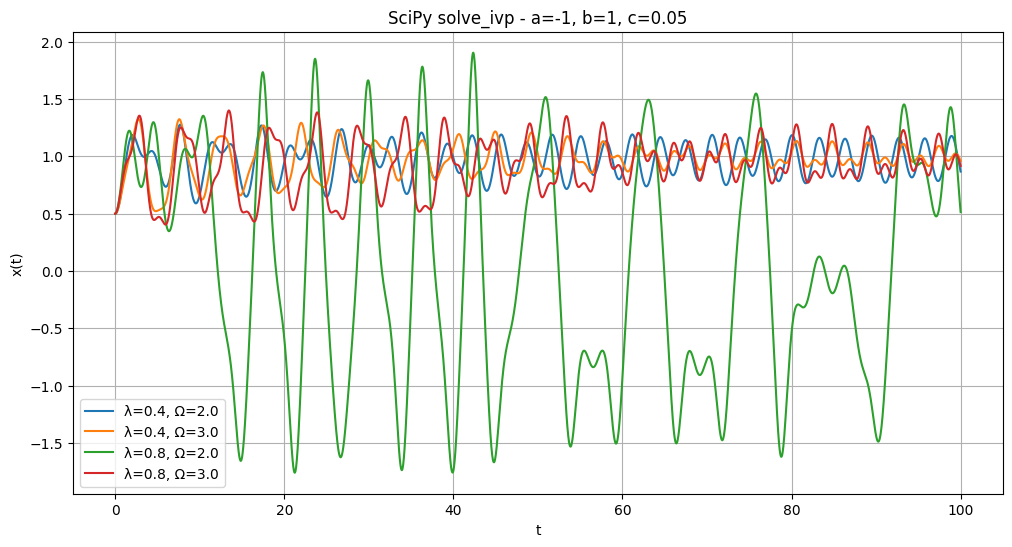

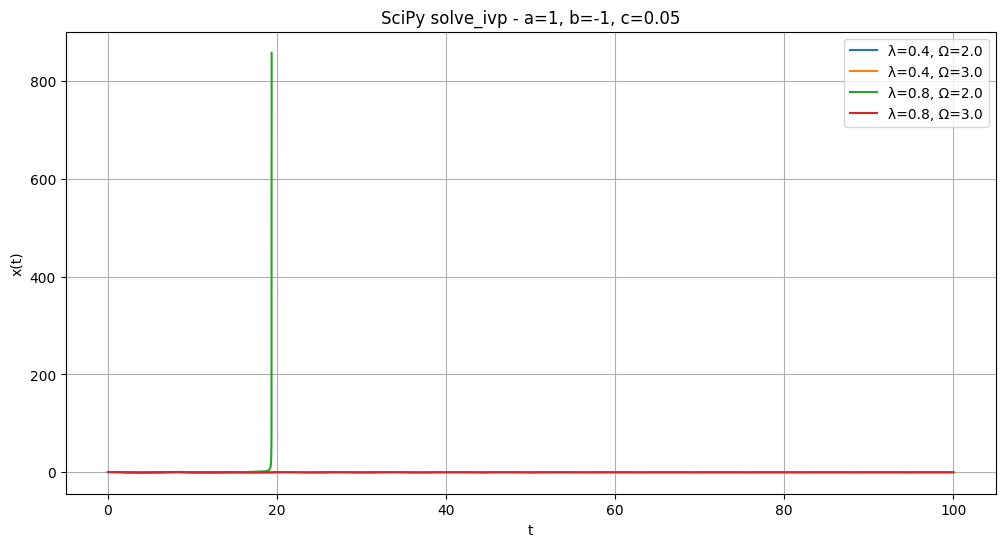

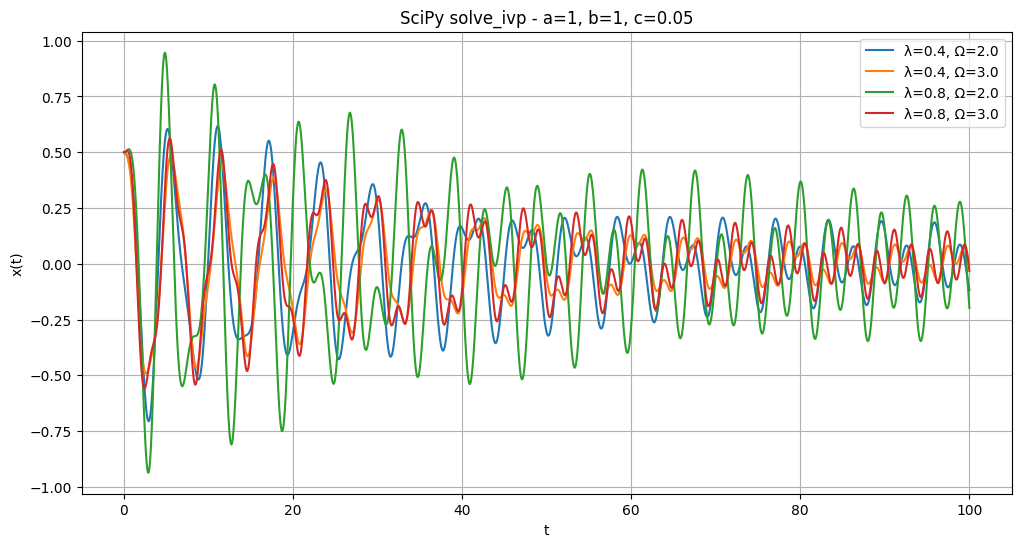

In [37]:
# Simulação e gráficos
for a in a_vals:
    for b in b_vals:
        plt.figure(figsize=(12,6))
        for lam in lam_vals:
            for Omega in Omega_vals:
                sol = solve_ivp(duffing, t_span, z0, args=(a, b, c, lam, Omega), t_eval=t_eval, method="RK45")
                plt.plot(sol.t, sol.y[0], label=f"λ={lam}, Ω={Omega}")
        plt.title(f"SciPy solve_ivp - a={a}, b={b}, c={c}")
        plt.xlabel("t")
        plt.ylabel("x(t)")
        plt.legend()
        plt.grid()
        plt.show()

In [13]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.000e-02 ...  9.998e+01  1.000e+02]
        y: [[ 5.000e-01  4.999e-01 ...  8.038e-03  7.686e-03]
            [ 0.000e+00 -1.229e-02 ... -1.748e-02 -1.764e-02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 674
     njev: 0
      nlu: 0

In [12]:
sol = solve_ivp(duffing, t_span, z0, args=(1, 1, 0.05, 0.01, 0.8), t_eval=t_eval, method="RK45")

In [14]:
sol.t

array([0.00000000e+00, 2.00040008e-02, 4.00080016e-02, ...,
       9.99599920e+01, 9.99799960e+01, 1.00000000e+02])

In [19]:
import pandas as pd
df = pd.DataFrame()
df["T"] = sol.t
df["Y"] = sol.y
df.head

ValueError: Length of values (2) does not match length of index (5000)

In [ ]:
pd.DataFrame